# ANÁLISIS UNIVARIANTE

* OBJETIVO: Describir los datos y encontrar los patrones que existen en ellos.
* EDA (Análisis Descriptivo Exploratorio): 
    * Examina el rango, así como, la tendencia central de los valores.
    * Describe el patrón de respuesta a la variable. 
    * Describe cada variable por separado.
* Técnicas utilizadas:
    1. Estadística Descriptiva: 
        * Medidas de tendencia central (media, mediana y moda).
        * Medidas de dispersión: (rango, máximo, mínimo, cuartiles y desviación estándar). 
    2. Mostrar los datos univariantes:
        * Histograma por cada variable numérica
        * Gráfico de barras para variables categóricas
        * Gráfico de líneas para variables temporales

## 1. Importar librerías

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

from math import pi
from ydata_profiling import ProfileReport

## 2. Cargar datos

In [39]:
ruta = '../data/calidad_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


## 3. Preparar datos

* Crear nuevas columnas categóricas
* Transformar columnas
* Seleccionar las columnas sobre las que realizar EDA


In [40]:
# Explorar columnas del dataset, para crear,transformar y eliminar las que sean necesarias para el análisis
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

#### 3.1  Crear columna 'ESCALA_ICA'

El objetivo de esta columna es analizar la Calidad del Aire en funcián de los rangos de medición establecidos por el Ayuntamiento de Madrid.

Escala de calidad del aire globar y por contaminante: 

                Muy Buena   Buena     Regular    Mala     Muy Mala      Peligrosa

    * ICA:      0-19        20-49     50-99     100-149  150-249        250+
    * PM2.5:    0-15 	16-30     31-55     56-110   >110
    * PM10:     0-25 	26-50 	  51-90     91-180   >180
    * NO2:      0-50 	51-100   101-200    201-400  >400
    * O3: 	    0-60        61-120   121-180    181-240  >240
    * SO2: 	    0-50        51-100   101-350    351-500  >500

In [41]:
# Crear la columna "escala_ica" basada en los valores de la columna "ICA"
df['ESCALA_ICA'] = pd.cut(df['ICA'], bins=[-float('inf'), 19, 49, 99, 149, 249, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala', 'Peligrosa'])
df['ESCALA_PM2.5'] = pd.cut(df['PM2.5'], bins=[-float('inf'), 15, 30, 55, 110, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_PM10'] = pd.cut(df['PM10'], bins=[-float('inf'), 25, 50, 90, 180, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_NO2'] = pd.cut(df['NO2'], bins=[-float('inf'), 50, 100, 200, 400, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_O3'] = pd.cut(df['O3'], bins=[-float('inf'), 60, 120, 180, 240, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_SO2'] = pd.cut(df['SO2'], bins=[-float('inf'), 50, 100, 350, 500, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])

# Imprimir el resultado
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_PM10,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,38.0,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,32.0,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena


#### 3.2 Crear columna 'TRAMO_HORA'

Esta columna dividirá la columna 'HORA' en dos tramos:

* Punta:  8 a 20
* Valle:  21 a 7

In [42]:
# Convertir la columna "FECHA" en un objeto de fecha y hora
df['HORA'] = pd.to_datetime(df['FECHA']).dt.hour

# Definir la función para clasificar el tramo de hora
def clasificar_tramo_hora(hora):
    if 8 <= hora <= 20:
        return 'Hora Punta'
    else:
        return 'Hora Valle'

# Crear la columna "TRAMO_HORA"
df['TRAMO_HORA'] = df['HORA'].apply(clasificar_tramo_hora)

# Mostrar el DataFrame resultante
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle


#### 3.3 Transformar columnas de FECHA

Transformar estas columnas a formato datetime

* FECHA
* ANO
* MES
* DIA

In [43]:
# Convertir la columna "FECHA" en un objeto de fecha y hora
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['ANO'] = pd.to_datetime(df['FECHA']).dt.year
df['MES'] = pd.to_datetime(df['FECHA']).dt.month
df['DIA'] = pd.to_datetime(df['FECHA']).dt.day
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA
0,2019-01-01 05:00:00,2019,1,1,5,Martes,8.0,10.0,0.4,50.0,...,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle
1,2019-01-01 06:00:00,2019,1,1,6,Martes,8.0,8.0,0.4,55.0,...,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle


In [44]:
# Comprobar si se ha realizado las transformaciones
df.dtypes

FECHA           datetime64[ns]
ANO                      int64
MES                      int64
DIA                      int64
HORA                     int64
DIA_SEMANA              object
ESTACION               float64
SO2                    float64
CO                     float64
NO2                    float64
PM2.5                  float64
PM10                   float64
O3                     float64
BTX                    float64
TEMPERATURA            float64
HUMEDAD                float64
ICA_SO2                float64
ICA_PM10               float64
ICA_O3                 float64
ICA_NO2                float64
ICA                    float64
ESCALA_ICA            category
ESCALA_PM2.5          category
ESCALA_PM10           category
ESCALA_NO2            category
ESCALA_O3             category
ESCALA_SO2            category
TRAMO_HORA              object
dtype: object

#### 3.4 Eliminar columnas

Eliminar aquellas columnas que no son necesarias para el EDA

In [45]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'ESCALA_ICA',
       'ESCALA_PM2.5', 'ESCALA_PM10', 'ESCALA_NO2', 'ESCALA_O3', 'ESCALA_SO2',
       'TRAMO_HORA'],
      dtype='object')

In [46]:
# Se eliminan las columnas númericas que no interesan para las estadisticas 
df_hist = df.drop(['FECHA','ANO','MES','DIA','HORA','ESTACION','ICA_SO2','ICA_PM10','ICA_O3','ICA_NO2'],axis=1)
df_hist.head(2)

,DIA_SEMANA,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA
0,Martes,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle
1,Martes,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle


## 4. EDA (Análisis Exploratorio Univariante)

####  4.1.1 Estadísticas Descriptivas

In [47]:
df_hist.describe().round(2)

,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA
count,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00
mean,4.85,0.25,31.53,7.77,15.07,53.31,2.28,16.42,54.96,39.31
std,3.03,0.09,17.31,5.25,9.00,25.18,1.55,7.96,21.73,11.94
min,0.00,0.10,3.00,0.00,1.00,0.79,0.00,-2.90,8.00,12.94
25%,2.00,0.20,18.00,4.00,8.00,35.56,1.10,10.20,38.00,30.55
50%,4.00,0.20,29.00,7.00,14.00,52.04,1.90,15.50,54.00,37.99
75%,8.00,0.30,42.00,10.00,19.00,69.48,3.10,22.20,71.00,46.26
max,17.00,0.40,97.00,26.00,46.00,127.20,7.90,40.00,100.00,96.86


#### 4.1.2. Visualización con Gráficos de Densidad

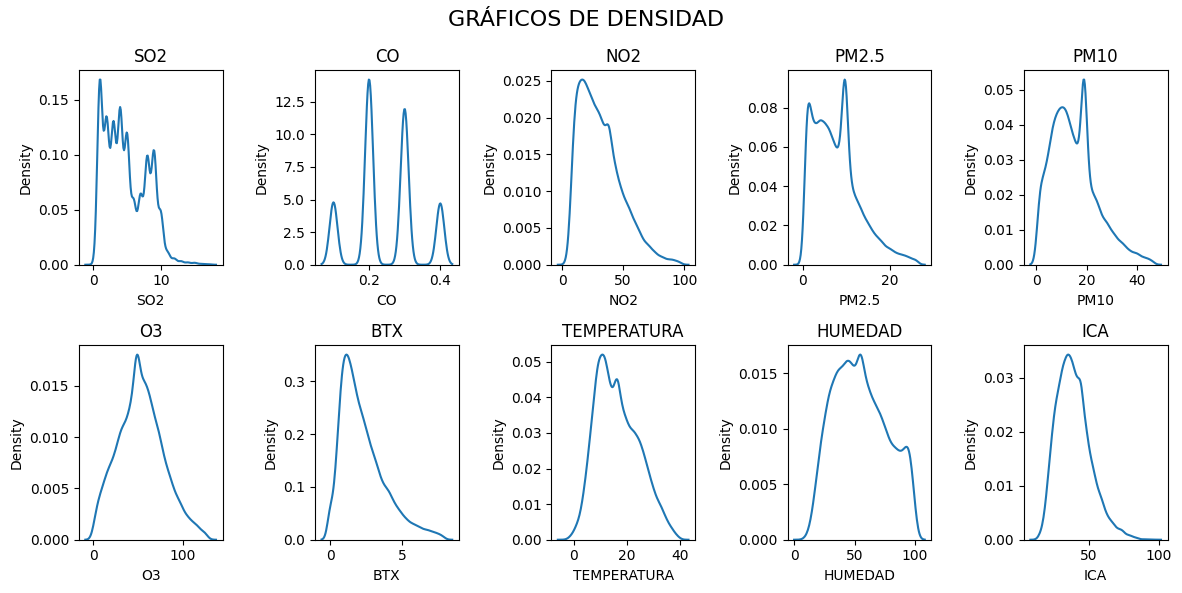

In [48]:

numeric_columns = df_hist.select_dtypes(include=np.number).columns.to_list()
num_plots = len(numeric_columns)
num_cols = 5
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))


for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols

    axs[row, col].set_title(f'{column}')
    sns.kdeplot(data=df, x=column, ax=axs[row, col])
    
# Agregar título general a la figura
plt.suptitle('GRÁFICOS DE DENSIDAD', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.show()

#### 4.1.2 Histogramas para cada varible numérica en subplots

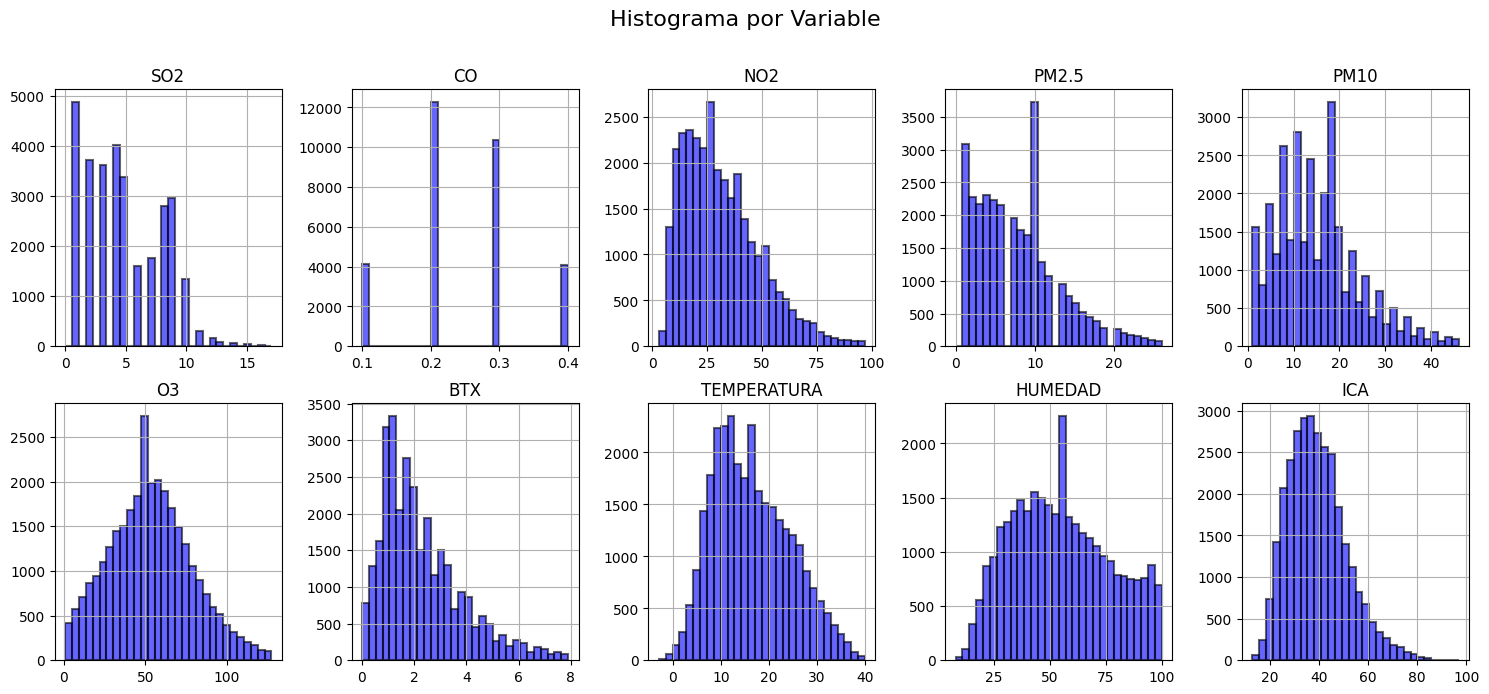

In [49]:
# Graficar los histogramas en subplots
df_hist.hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(15, 10), layout=(3, 5))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar título general
plt.suptitle('Histograma por Variable', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=0.9)

# Mostrar los histogramas
plt.show()

    CONCLUSIÓN:

    Con la observación de los histogramas podemos verificar: 

    * La distribución es normal, es decir, tiene forma de campana, en las varibles  O3, TEMPERATURA e ICA 

    * La distribución está sesgada, es decir, tiene forma de campana pero asimétrica, en las variables NO2, PM2.5, PM10, BTX y HUMEDAD.

    * La distribución sufre variaciones en el tiempo, en las variables SO2 y CO.

####  4.2. Visualización columnas categóricas

In [50]:
df.dtypes

FECHA           datetime64[ns]
ANO                      int64
MES                      int64
DIA                      int64
HORA                     int64
DIA_SEMANA              object
ESTACION               float64
SO2                    float64
CO                     float64
NO2                    float64
PM2.5                  float64
PM10                   float64
O3                     float64
BTX                    float64
TEMPERATURA            float64
HUMEDAD                float64
ICA_SO2                float64
ICA_PM10               float64
ICA_O3                 float64
ICA_NO2                float64
ICA                    float64
ESCALA_ICA            category
ESCALA_PM2.5          category
ESCALA_PM10           category
ESCALA_NO2            category
ESCALA_O3             category
ESCALA_SO2            category
TRAMO_HORA              object
dtype: object

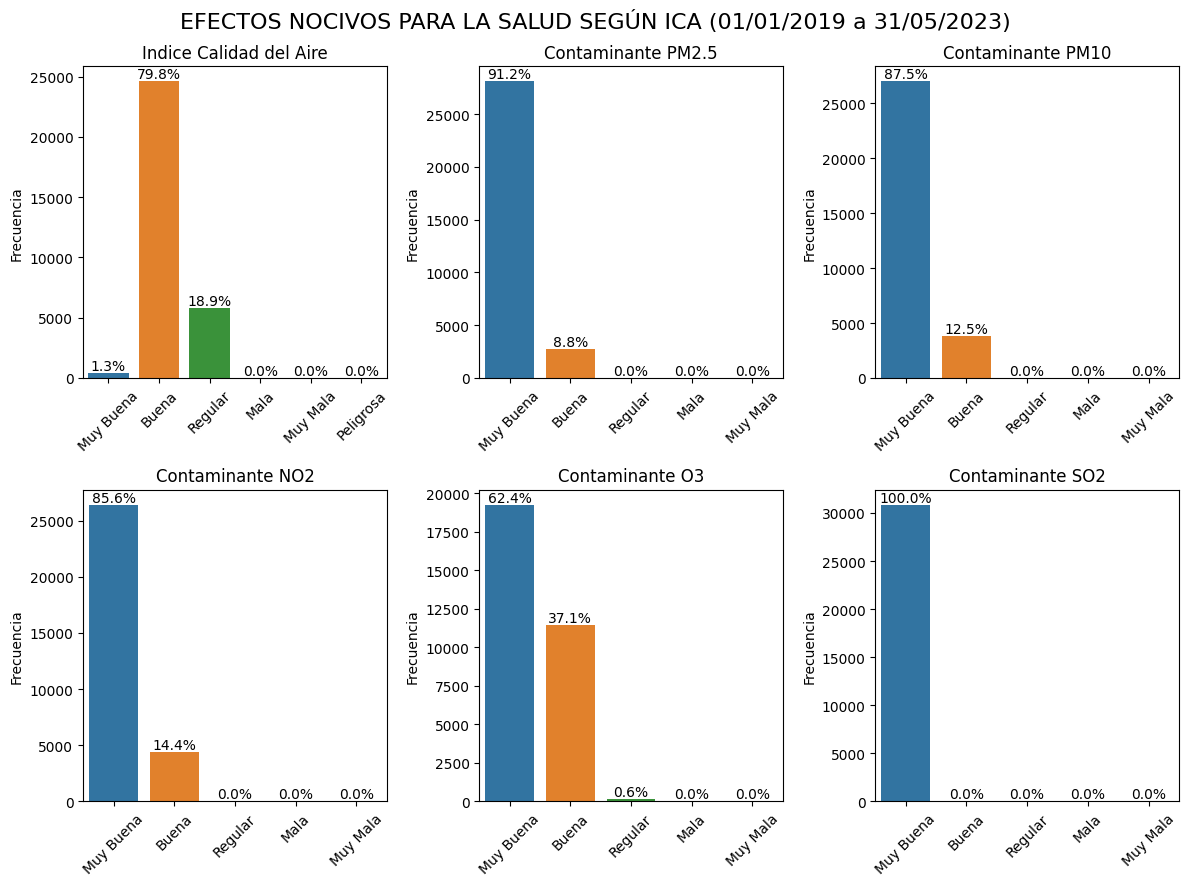

In [51]:
categorical_columns = df.select_dtypes(include='category').columns.to_list()

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots + 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.countplot(data=df, x=column, ax=ax)
    
    # Cambiar título según la columna
    if  column == 'ESCALA_PM2.5':
        ax.set_title('Contaminante PM2.5')
    elif column == 'ESCALA_PM10':
        ax.set_title('Contaminante PM10')
    elif column == 'ESCALA_NO2':
        ax.set_title('Contaminante NO2')
    elif column == 'ESCALA_O3':
        ax.set_title('Contaminante O3')
    elif column == 'ESCALA_SO2':
        ax.set_title('Contaminante SO2')
    else:
        ax.set_title('Indice Calidad del Aire')
    
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

    # Rotar el eje x
    ax.tick_params(axis='x', rotation=45)

    # Mostrar el porcentaje en la parte superior de cada barra
    total = len(df)
    for p in ax.patches:
        percentage = (p.get_height() / total * 100)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='bottom')
    
# Eliminar subparcelas vacías si es necesario
if num_plots % num_cols != 0:
    fig.delaxes(axes[-1, -1])

# Agregar título general a la figura
plt.suptitle('EFECTOS NOCIVOS PARA LA SALUD SEGÚN ICA (01/01/2019 a 31/05/2023)', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)

plt.tight_layout()
plt.show()


    CONCLUSIÓN:

    Estos gráficos de barras muestan el porcentaje en que el Indice de Calidad del Aire (ICA) y las concentracciones de los contaminantes han sido nocivos para la salud,  en el período de 01/01/2019 a 31/05/2023.
  
    Resumen por contamiente y el efecto que produce en la salud:

    * ICA: Ha resultado nocivo para la salud un 18.9% de las ocasiones.
    * PM2.5: Ha resultado nocivo para la salud un 8.8% de las ocasiones. 
        - La inhalación de estas partículas afectan de forma grave a los pulmones y el corazón.
        - La exposición a estas partículas puede provocar tos o dificultad para respirar, agravar el asma y desarrollar enfermedades respiratorias crónicas. 
    
    * PM10: Ha sido nocivo para la salud un 12.5% de las ocasiones.
        - La exposición puede provocar irritación de ojos y garganta, tos, dificultad para respirar y puede agravar el asma.

    * NO2, SO2 y O3: No ha resultado nocivo para la salud en el período de tiempo analizado, puesto que no han superado los umbrales permitidos.

#### 4.3. Visualización histórico de Fecha

* Mediante está visualización se puedes observara si existe estacionalidad de Indice de Calidad del aire (ICA) en el tiempo (01/2019 a 05/2023)

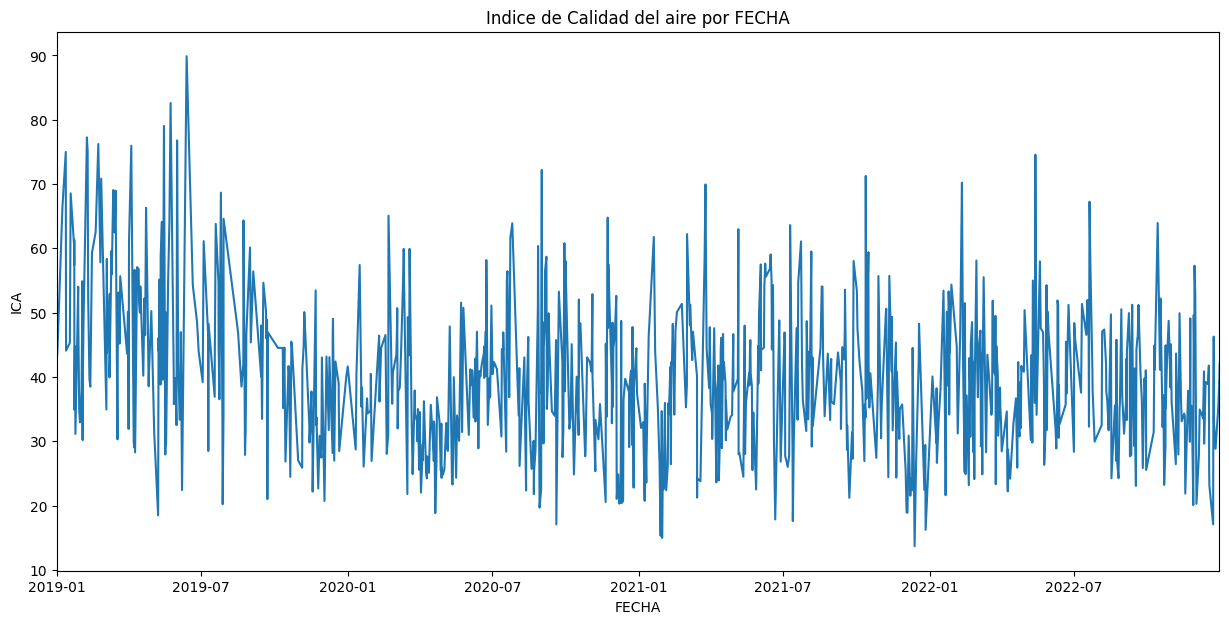

In [52]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(15,7))
    
    sns.lineplot(data=df.sample(1000), x=column, y='ICA')
    plt.title('Indice de Calidad del aire por ' + column)
    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2022-12-31'))
    plt.show()

    CONCLUSIONES: 

    En esta gráfica se puede observar como a lo largo del año 2019 el ICA era más elevado, observando una disminución en torno a Julio de 2019, manteniéndose constante hasta Julio de 2021, mes en el que vuelve a sufrir un fuerte incremento, volviéndose a reducir en torno a Septiembre de 2021 y manteniéndose constante hasta aproximadamen Junio/Julio de 2022. 

    Observando esta gráfica podemos concluir que el ICA sufre incrementos durante los meses de verano, vólviendose a reducir en Otoño y manteniéndose constante a lo largo del año.

# ANÁLISIS BIVARIANTE

El análisis bivariante se utiliza para examinar la relación o asociación entre dos variables en un conjunto de datos.

El análisis bivariante puede ser útil para:

1. Identificar correlaciones: El análisis bivariante permite determinar si existe una relación entre dos variables y si esa relación es positiva, negativa o no existe. Esto puede ayudar a comprender cómo una variable afecta a la otra y a identificar patrones o tendencias.

2. Realizar pruebas de hipótesis: El análisis bivariante puede usarse para evaluar si hay diferencias significativas entre dos grupos o categorías en función de una variable. Esto puede ayudar a determinar si una variable tiene un impacto estadísticamente significativo en otra variable.

3. Visualizar la relación: El análisis bivariante a menudo se representa mediante gráficos, como gráficos de dispersión, diagramas de cajas y bigotes, o gráficos de barras. Estos gráficos permiten visualizar la relación entre las dos variables y pueden revelar patrones o tendencias visuales.

4. Predecir valores: El análisis bivariante puede ayudar a predecir valores de una variable en función de otra variable. 

## 1. Importar librerías

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import locale

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

## 2. Cargar datos

In [54]:
ruta = '../data/calidad_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [73]:
df['ANO'] = df['ANO'].astype(int)
df['MES'] = df['MES'].astype(int)
df['DIA'] = df['DIA'].astype(int)
df['HORA'] = df['HORA'].astype(int)

In [74]:
df.dtypes

FECHA            object
ANO               int32
MES               int32
DIA               int32
HORA              int32
DIA_SEMANA       object
ESTACION         object
SO2             float64
CO              float64
NO2             float64
PM2.5           float64
PM10            float64
O3              float64
BTX             float64
TEMPERATURA     float64
HUMEDAD         float64
ICA_SO2         float64
ICA_PM10        float64
ICA_O3          float64
ICA_NO2         float64
ICA             float64
ESTACION_AÑO     object
TIPO_DIA         object
TRAMO_HORA       object
TIPO_HORA        object
dtype: object

## 3. Análisis Bivariante

En este apartado se analizará la variación del ICA, según los siguientes criterios:

* Por Estaciones del Año (Primavera, Verano, Otoño, Invierno)
* Por Distribución Horaria (Punta, Valle, LLana)
* Por Tipo de Día (Laborable, Festivo, Vispera Festivo)

#### 3.1 Gráficos de Dispersión

* Analizar la relación de ICA con el resto de contaminantes atmósfericos y con los datos metereológicos

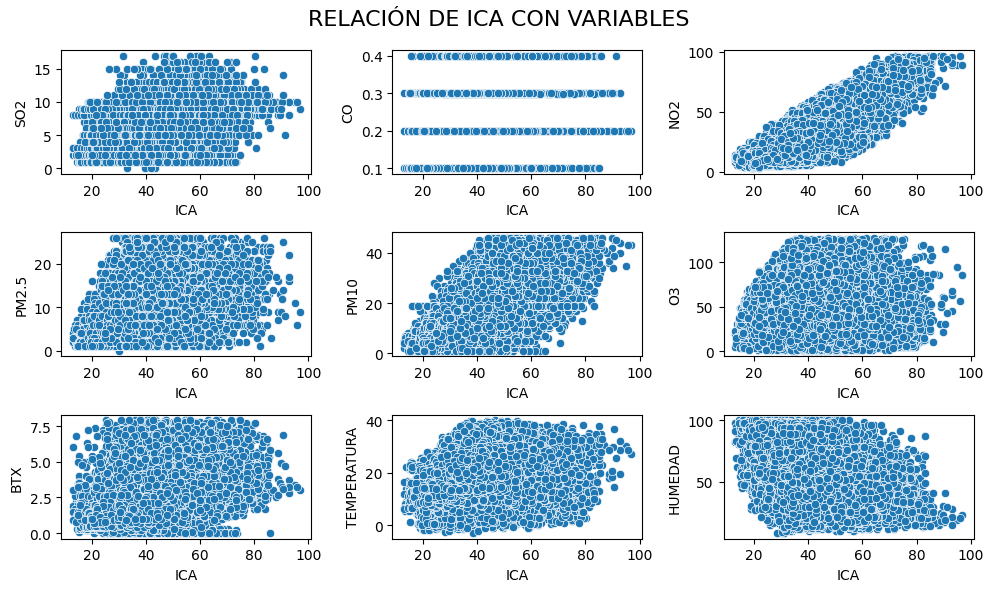

In [75]:
selected_columns = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD']

num_plots = len(selected_columns)
num_cols = 3
num_rows = (num_plots + 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i, column in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.scatterplot(data=df, x=df['ICA'], y=column, ax=ax)

    ax.set_xlabel('ICA')
    ax.set_ylabel(column)

    
# Eliminar subparcelas vacías si es necesario
if num_plots % num_cols != 0:
    fig.delaxes(axes[-1, -1])

# Agregar título general a la figura
plt.suptitle('RELACIÓN DE ICA CON VARIABLES', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)

plt.tight_layout()
plt.show()

#### 3.2 Gráficos de Barras

##### 3.2.1 ICA por Año

Text(0.5, 1.0, 'Evolución de la  Calidad del aire por AÑO')

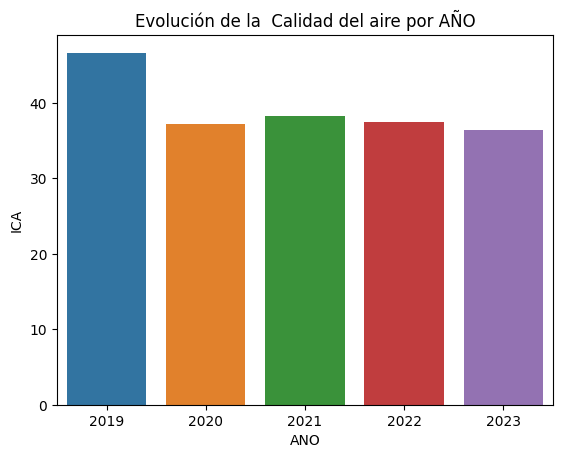

In [76]:
df_ica_ano = df.groupby('ANO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='ANO', y='ICA')
plt.title('Evolución de la  Calidad del aire por AÑO' )

 ##### 3.2.2 ICA por Estación del Año

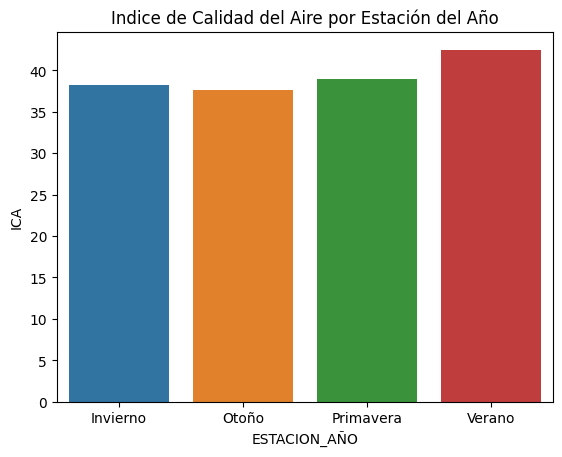

In [77]:
# Crear columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION_AÑO'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

df_est_año = df.groupby('ESTACION_AÑO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_est_año, x='ESTACION_AÑO', y='ICA')

plt.title('Indice de Calidad del Aire por Estación del Año')
plt.show()

 ##### 3.2.3. ICA por Día Semana (Laborable, Festivo, Víspera Festivo)

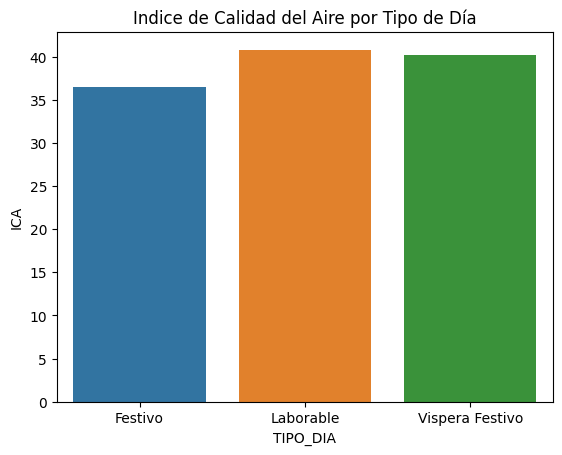

In [78]:
# Crear columna 'ESTACION' para agrupar meses en estaciones
df['TIPO_DIA'] = df['DIA_SEMANA'].apply(lambda x: 'Laborable' if x in ['Martes', 'Miercoles', 'Jueves'] else 'Vispera Festivo' if x in ['Lunes', 'Viernes'] else 'Festivo')

df_tipo_dia = df.groupby('TIPO_DIA')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_tipo_dia, x='TIPO_DIA', y='ICA')

plt.title('Indice de Calidad del Aire por Tipo de Día')
plt.show()

 ##### 3.2.4. ICA por Tramo Horario (Valle, Llana, Plano)

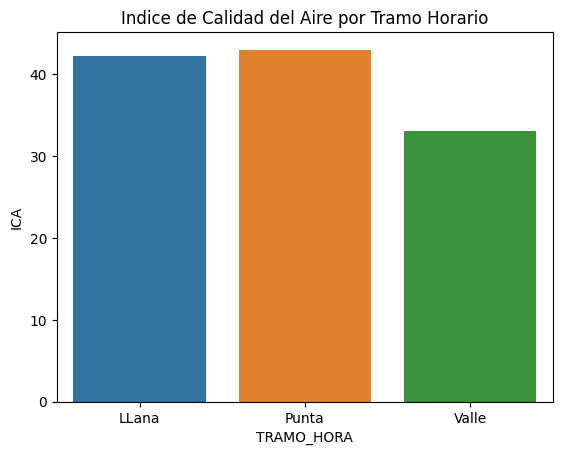

In [79]:
# Crear columna 'TIPO_HORA' para agrupar horas en valle y punta
df['TRAMO_HORA'] = df['HORA'].apply(lambda x: 'Punta' if 8 <= x <= 20 else 'LLana' if 21 <= x <= 24 else 'Valle')

df_tramo_hora = df.groupby('TRAMO_HORA')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_tramo_hora, x='TRAMO_HORA', y='ICA')

plt.title('Indice de Calidad del Aire por Tramo Horario')
plt.show()


#### 3.3 Gráficos de Barras Agrupadas

##### 3.3.1 Gráficos de Barras por Año y Estación del Año

Diferenciar el índice de calidad del aire (ICA) en cada año y para cada estación del año. 
Cada barra representará un año y estará dividida en secciones para cada estación del año.

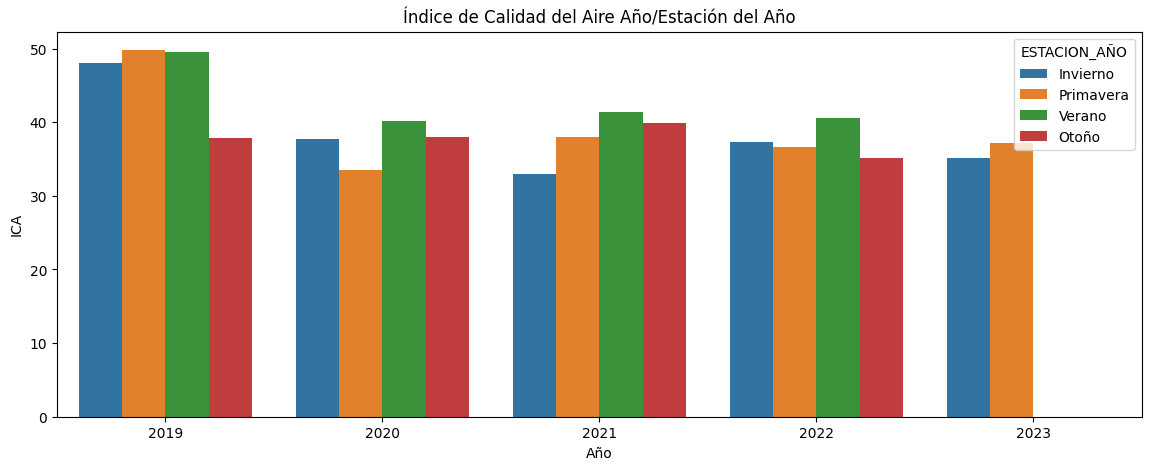

In [80]:
# Crear una nueva columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION_AÑO'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 5))

# Graficar el gráfico de barras agrupadas
sns.barplot(data=df, x='ANO', y='ICA', hue='ESTACION_AÑO', errorbar=None)

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire Año/Estación del Año')
plt.xlabel('Año')
plt.ylabel('ICA')

# Configurar las etiquetas del eje x como números enteros
#plt.xticks(df['ANO'].unique().astype(int))

# Mostrar el gráfico
plt.show()


##### 3.3.2 Gráficos de Barras por Año y Mes

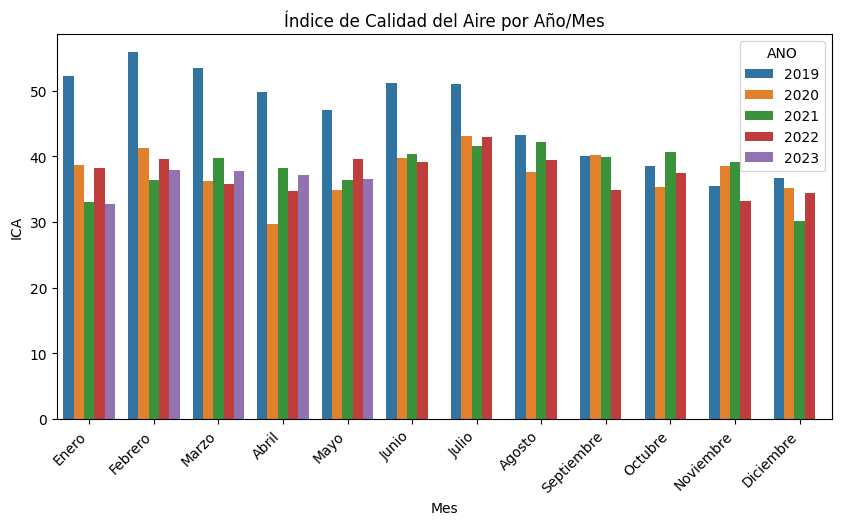

In [81]:
# Establecer la configuración regional en español
locale.setlocale(locale.LC_ALL, 'es_ES')

# Obtener los nombres de los meses en español
nombres_meses = [calendar.month_name[i].capitalize() for i in range(1, 13)]

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Graficar el gráfico de barras agrupadas
sns.barplot(data=df, x='MES', y='ICA', hue='ANO', errorbar=None)

# Configurar los nombres de los meses en el eje x
plt.xticks(ticks=range(12), labels=nombres_meses, rotation=45, ha='right')

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año/Mes')
plt.xlabel('Mes')
plt.ylabel('ICA')

# Mostrar el gráfico
plt.show()


## ANÁLISIS MULTIVARIANTE

El análisis multivariante se utiliza para explorar y comprender las relaciones complejas entre múltiples variables. Proporciona información valiosa para la toma de decisiones y la comprensión de los datos en diversas áreas de estudio.

Algunas de las aplicaciones comunes del análisis multivariante incluyen:

1. Análisis de componentes principales (PCA): Es una técnica que reduce la dimensionalidad de un conjunto de datos al transformar las variables originales en un conjunto más pequeño de componentes principales. Ayuda a identificar las variables más importantes y a visualizar la estructura del conjunto de datos.

2. Análisis de cluster: Permite agrupar objetos o individuos similares en grupos homogéneos según sus características. Ayuda a identificar patrones y segmentos en los datos.

3. Análisis de regresión múltiple: Examina la relación entre una variable dependiente y varias variables independientes. Ayuda a comprender el impacto de las variables independientes en la variable dependiente y a predecir valores futuros.

4. Análisis discriminante: Permite clasificar objetos en diferentes grupos basándose en un conjunto de variables predictoras. Ayuda a identificar las variables más discriminantes y a predecir la pertenencia a un grupo.

5. Análisis de series temporales: Examina las relaciones y patrones en datos secuenciales a lo largo del tiempo. Ayuda a predecir tendencias y patrones futuros.

6. Análisis de correspondencias: Explora las relaciones entre variables categóricas. Ayuda a identificar asociaciones y patrones entre las categorías.

## 1. Importar librerías

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import locale

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

## 2. Cargar datos

In [85]:
ruta = '../data/calidad_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [86]:
# Transformar las columnas a númericas para que en las gráficas se muestren en el formato correcto

df['ANO'] = df['ANO'].astype(int)
df['MES'] = df['MES'].astype(int)
df['DIA'] = df['DIA'].astype(int)
df['HORA'] = df['HORA'].astype(int)

df.dtypes

FECHA           object
ANO              int32
MES              int32
DIA              int32
HORA             int32
DIA_SEMANA      object
ESTACION       float64
SO2            float64
CO             float64
NO2            float64
PM2.5          float64
PM10           float64
O3             float64
BTX            float64
TEMPERATURA    float64
HUMEDAD        float64
ICA_SO2        float64
ICA_PM10       float64
ICA_O3         float64
ICA_NO2        float64
ICA            float64
dtype: object

#### 3. Relaciones entre más de tres variables

##### 3.1. Matriz de Correlación

Muestra las correlaciones entre todas las variables en un conjunto de datos. 

Comprender las relaciones entre las variables e identificar patrones y asociaciones en los datos.

En la matriz de correlación, cada variable se representa en las filas y columnas de la matriz. Los valores de la matriz representan el coeficiente de correlación entre pares de variables. El coeficiente de correlación puede variar entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica una falta de correlación.

La matriz de correlación es útil para identificar las variables que están altamente correlacionadas entre sí. Esto puede ayudar a detectar multicolinealidad (alta correlación entre predictores) en un modelo de regresión, lo que puede afectar la interpretación de los coeficientes y la precisión del modelo.

Además, la matriz de correlación puede ser utilizada para seleccionar variables relevantes en un análisis multivariante. Si hay variables altamente correlacionadas, puede ser posible eliminar una de ellas sin perder información significativa.

In [87]:
# Se eliminan las columnas númericas que no interesan para las estadisticas 
df_rel = df.drop(['FECHA','ANO','MES','DIA','HORA','ESTACION','ICA_SO2','ICA_PM10','ICA_O3','ICA_NO2'],axis=1)
df_rel.head(2)

,DIA_SEMANA,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA
0,Martes,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,45.22
1,Martes,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,45.64


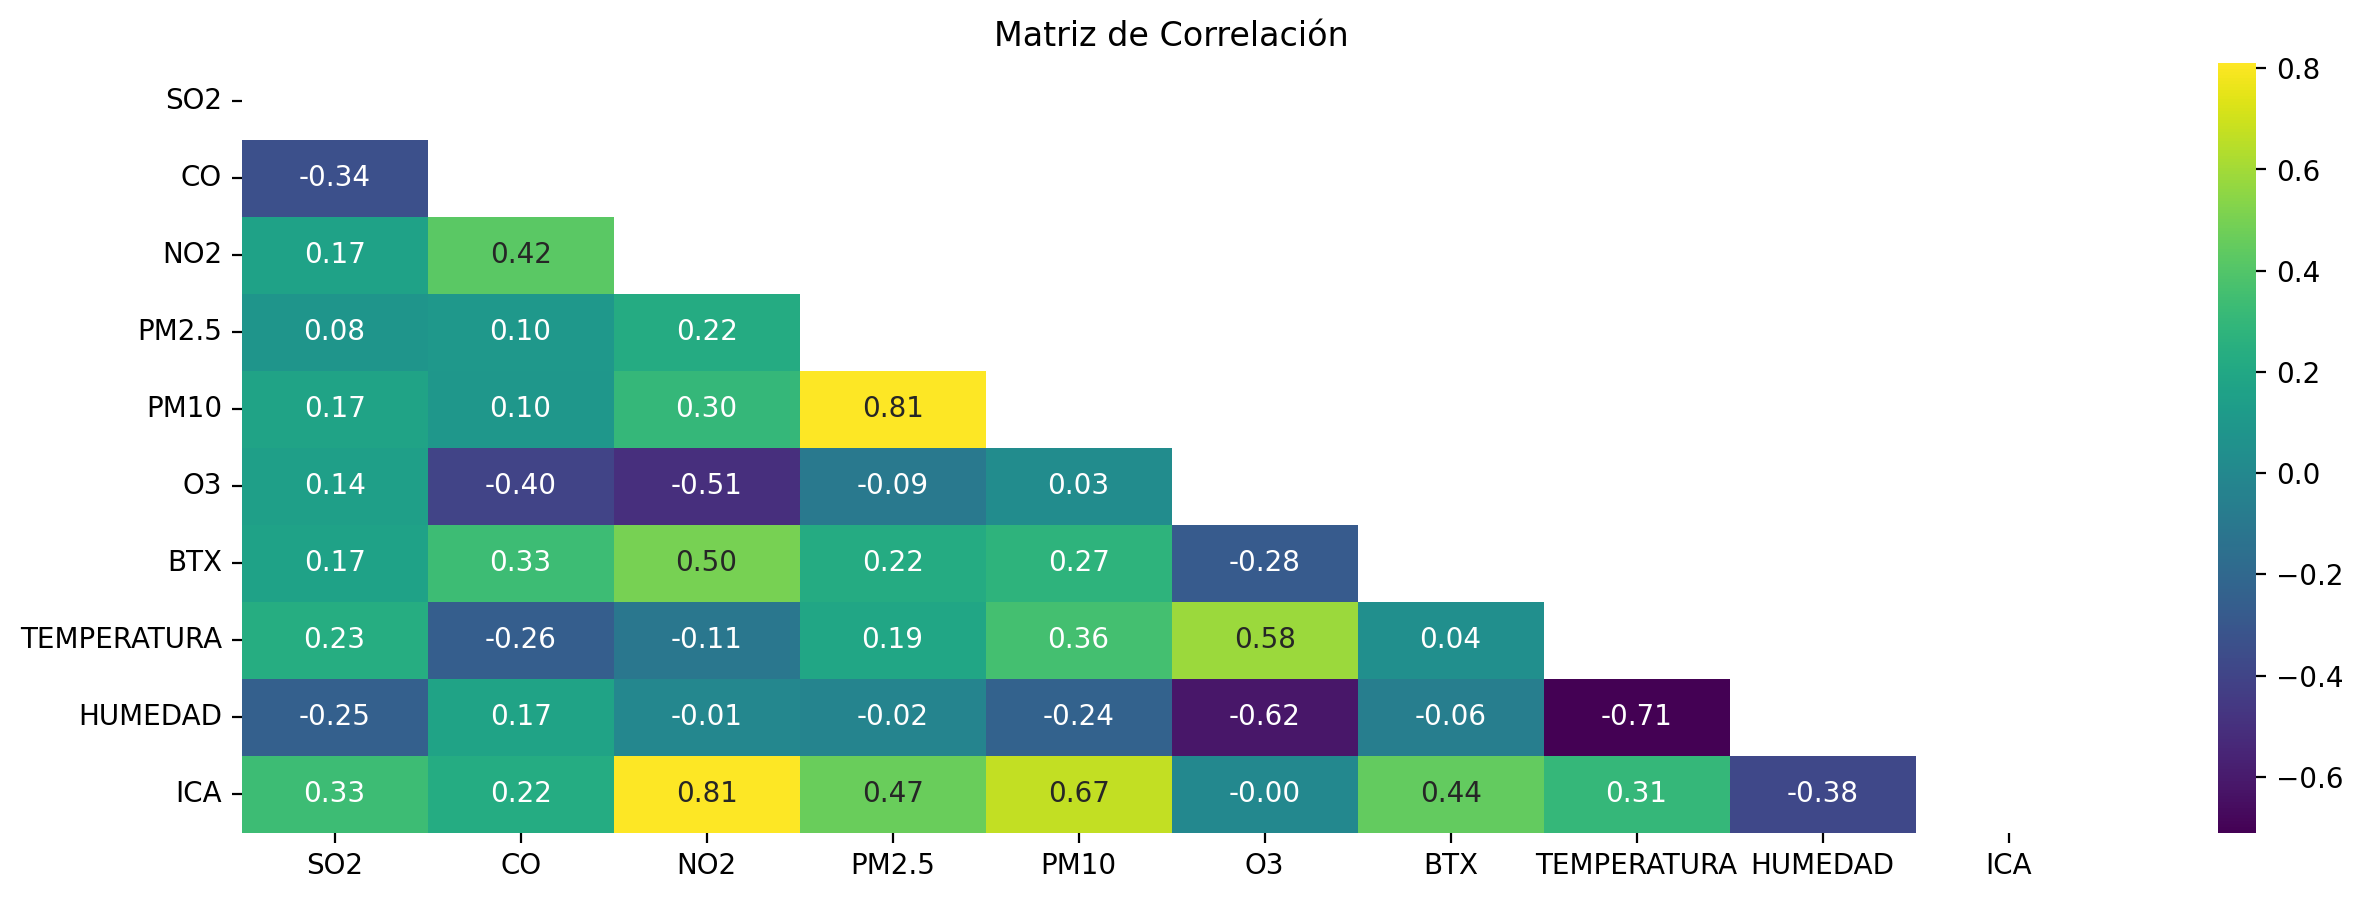

In [91]:
plt.figure(figsize=(15, 5), dpi=200)

df_corr = df_rel.corr(numeric_only=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # np.triu para el triángulo superior
sns.heatmap(df_corr, annot=True, cmap="viridis", mask=mask, fmt=".2f")

plt.title('Matriz de Correlación')

plt.show()

##### 3.2. Gráfica de Barras Matriz de Correlación

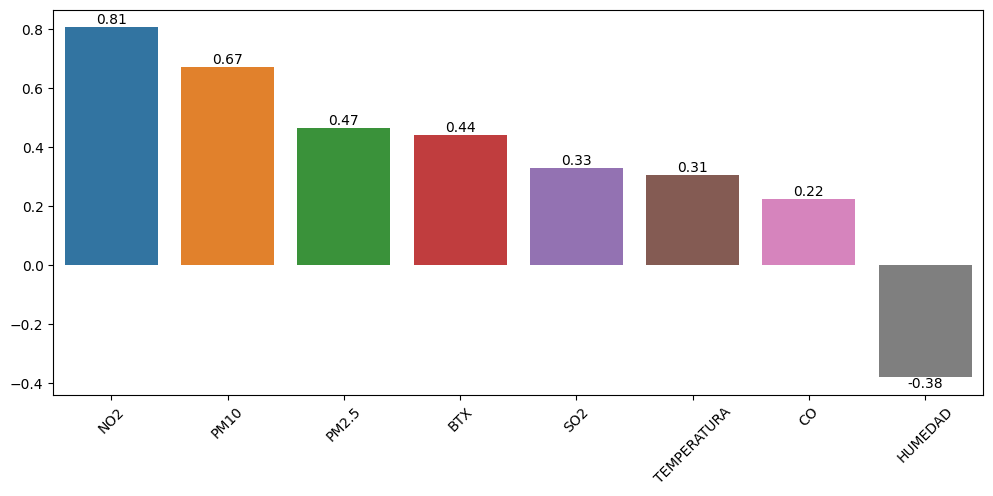

In [94]:
# Correlación con barras
df_corr =df_rel.corr() # matriz de correlación

corr_ICA = df_corr['ICA'] # filtrar correlación ICA
filter = (corr_ICA<-0.1) | (corr_ICA>0.1) # filtrar aquellas con baja correlación
corr_ICA = corr_ICA[filter]
corr_ICA = corr_ICA.sort_values(ascending=False)[1:] # ordenar descendente

plt.figure(figsize=(12,5))
ax =sns.barplot(x=corr_ICA.index, y=corr_ICA.values)
plt.xticks(rotation=45)

labels = [f'{value:.2f}' for value in corr_ICA.values] # redondear las correlaciones a dos decimales
ax.bar_label(ax.containers[0], labels= labels);

#### 4. Mapas de Calor

##### 4.1 Mapa de calor por Año y Hora

Diferenciar el índice de calidad del aire (ICA) en cada año y para cada hora.

1. Utilizamos df.pivot_table() para transformar los datos en una matriz de pivote, donde las filas representan las horas, las columnas representan los años y los valores son los índices de calidad del aire (ICA). 

2. Utilizamos sns.heatmap() para crear un mapa de calor a partir de la matriz de pivote. 

3. El mapa de calor proporciona una representación visual rápida de cómo varía el ICA en cada hora y año.


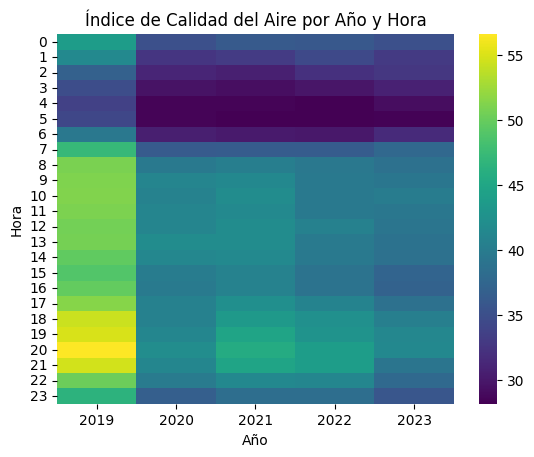

In [95]:
# Transformar los datos en una matriz de pivote
pivot_df = df.pivot_table(index='HORA', columns='ANO', values='ICA')

# Graficar el mapa de calor
sns.heatmap(data=pivot_df, cmap='viridis')

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año y Hora')
plt.xlabel('Año')
plt.ylabel('Hora')

# Mostrar el gráfico
plt.show()


##### 4.2. Mapa de calor por Año, Hora y Estación del Año

Diferenciar el índice de calidad del aire (ICA) en cada año, para cada hora y en las diferentes estaciones del año., puedes utilizar un mapa de calor (heatmap) con subplots para cada estación. Cada subplot representará una estación del año.

1. Creamos una nueva columna llamada 'ESTACION_AÑO' para agrupar los meses en estaciones del año. 

2. Utilizamos plt.subplots() para crear una cuadrícula de subplots, donde cada subplot representa una estación del año. 

3. Filtramos los datos para cada estación, creamos una matriz de pivote y graficamos un mapa de calor en cada subplot


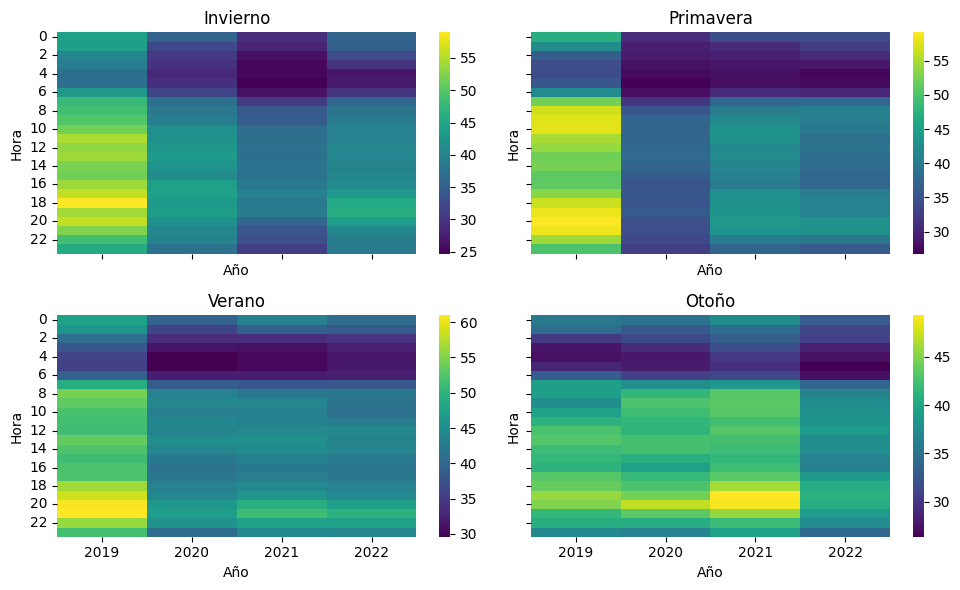

In [101]:
# Crear una nueva columna 'ESTACION_AÑO' para agrupar meses en estaciones
df['ESTACION_AÑO'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

# Crear subplots para cada estación
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

# Iterar sobre las estaciones y graficar el mapa de calor en cada subplot
for (estacion, ax) in zip(['Invierno', 'Primavera', 'Verano', 'Otoño'], axes.flatten()):
    pivot_df = df[df['ESTACION_AÑO'] == estacion].pivot_table(index='HORA', columns='ANO', values='ICA')
    sns.heatmap(data=pivot_df, cmap='viridis', ax=ax)
    ax.set_title(estacion)
    ax.set_xlabel('Año')
    ax.set_ylabel('Hora')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### 5. Gráfico pairplot

Un gráfico pairplot es una representación visual que muestra la relación entre múltiples variables en un conjunto de datos. Es una matriz de gráficos de dispersión, donde cada gráfico muestra la relación entre dos variables diferentes.

En un pairplot, cada variable del conjunto de datos se representa en el eje x y en el eje y de los gráficos. La diagonal de la matriz de gráficos muestra la distribución univariable de cada variable.

El pairplot es útil para identificar patrones, tendencias y posibles correlaciones entre las variables del conjunto de datos. Puede ayudar a visualizar la relación entre pares de variables y proporcionar información sobre la estructura general del conjunto de datos.

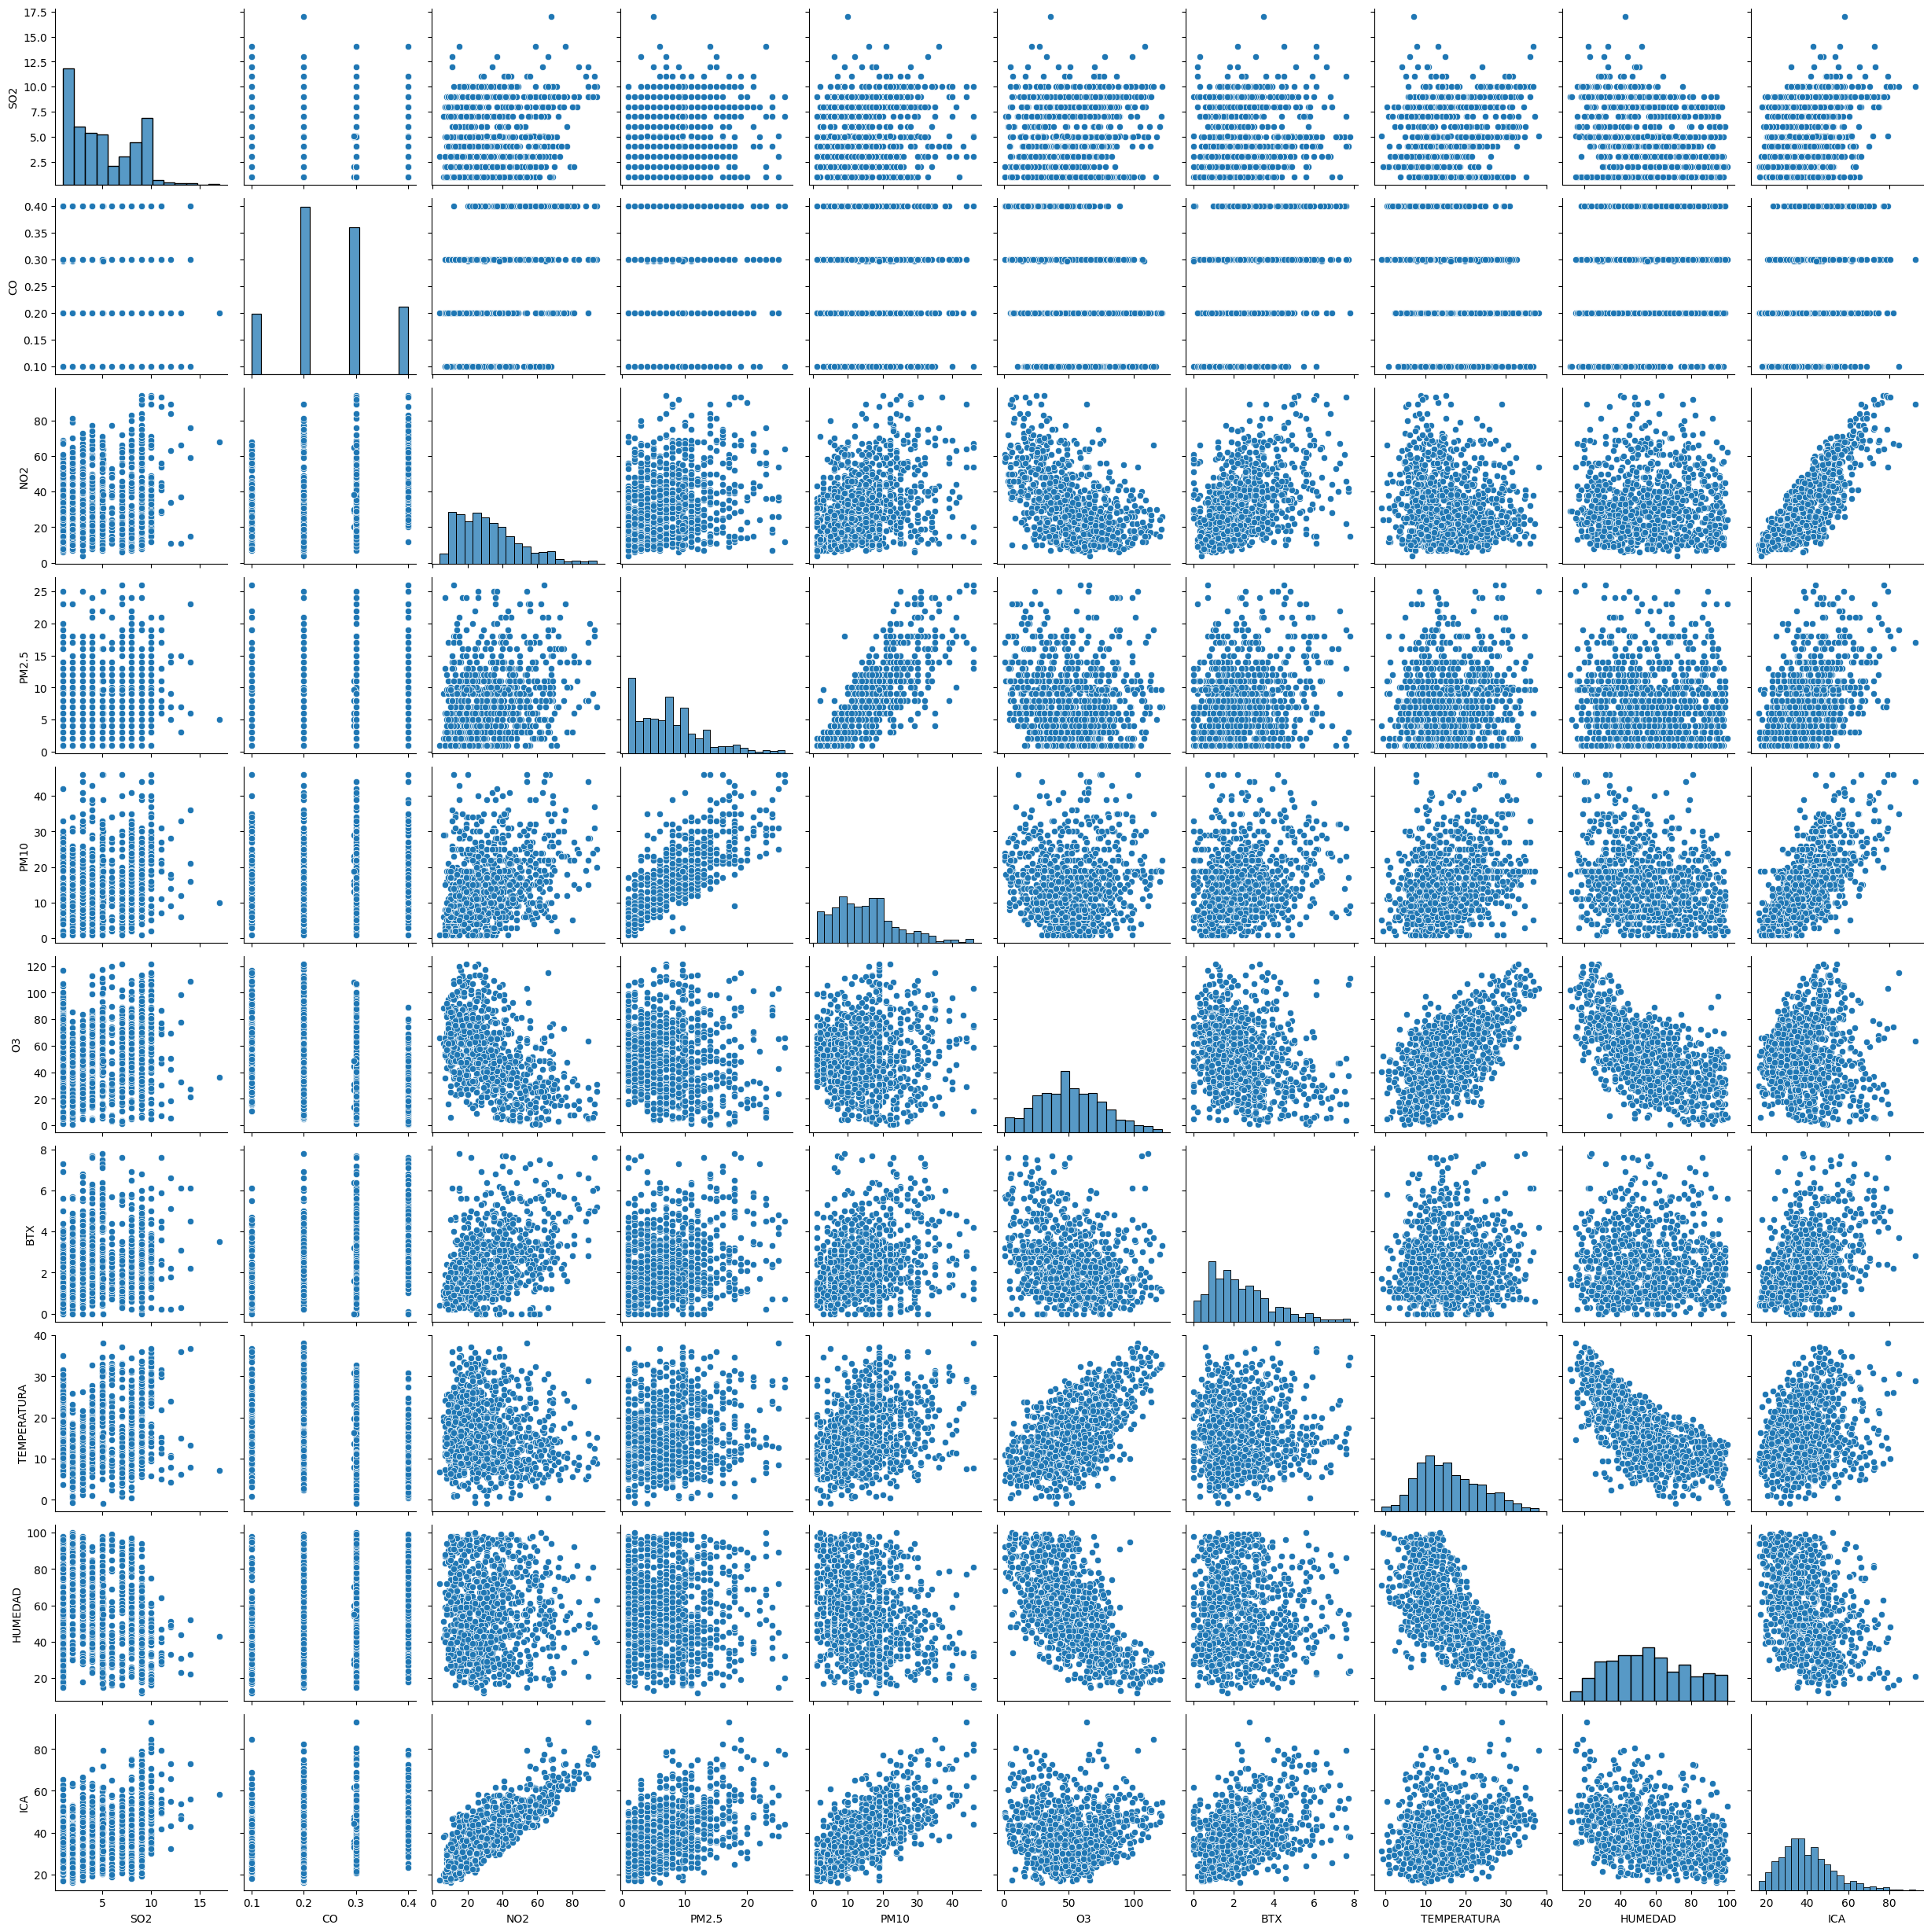

In [109]:

sns.pairplot(df_rel.sample(1000))